In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%set_env MRG32K3A_BACKEND=rust

env: MRG32K3A_BACKEND=rust


In [3]:
# Import the ProblemSolver class and other useful functions
from simopt.experiment_base import (
    PlotType,
    ProblemSolver,
    plot_feasibility_progress,
    plot_progress_curves,
    plot_terminal_feasibility,
    plot_terminal_progress,
    post_normalize,
)

In [4]:
from simopt.models.san import SANLongestPathStochastic
from simopt.solvers.fcsa import FCSA

In [5]:
# initialize problem
initial = (5,) * 13  # starting mean for each arc
constraint_nodes = [6, 8]  # nodes with corresponding stochastic constraints
max_length_to_node = [5, 5]  # max expected length to each constraint node
budget = 10000  # number of simmulation replications ran by solver
problem_factors = {
    "constraint_nodes": constraint_nodes,
    "length_to_node_constraint": max_length_to_node,
    "initial_solution": initial,
    "budget": budget,
}
problem = SANLongestPathStochastic(fixed_factors=problem_factors)

In [6]:
# initialize solvers
csa_factors = {
    "search_direction": "CSA",
    "normalize_grads": False,
    "report_all_solns": True,
    "crn_across_solns": False,
}
csa = FCSA(fixed_factors=csa_factors, name="CSA")
csa_n_factors = {
    "search_direction": "CSA",
    "normalize_grads": True,
    "report_all_solns": True,
    "crn_across_solns": False,
}
csa_n = FCSA(fixed_factors=csa_n_factors, name="CSA-N")
fcsa_factors = {
    "search_direction": "FCSA",
    "normalize_grads": True,
    "report_all_solns": True,
    "crn_across_solns": False,
}
fcsa = FCSA(fixed_factors=fcsa_factors, name="FCSA")
solvers = [csa, csa_n, fcsa]

In [7]:
e1 = ProblemSolver(solver=csa, problem=problem)
e2 = ProblemSolver(solver=csa_n, problem=problem)
e3 = ProblemSolver(solver=fcsa, problem=problem)

e1.run(n_macroreps=10)
e2.run(n_macroreps=10)
e3.run(n_macroreps=10)

e1.post_replicate(n_postreps=100)
e2.post_replicate(n_postreps=100)
e3.post_replicate(n_postreps=100)

post_normalize([e1, e2, e3], 100)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_terminal_violin_unnorm.png')]

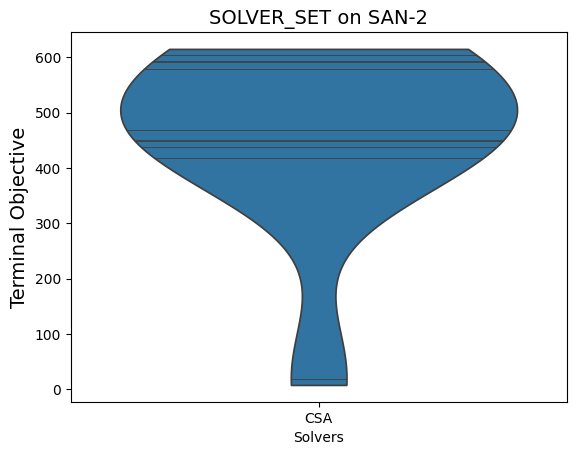

In [8]:
plot_terminal_progress([e1], PlotType.VIOLIN, normalize=False)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_feasibility_violin_inf_norm_unnorm.png')]

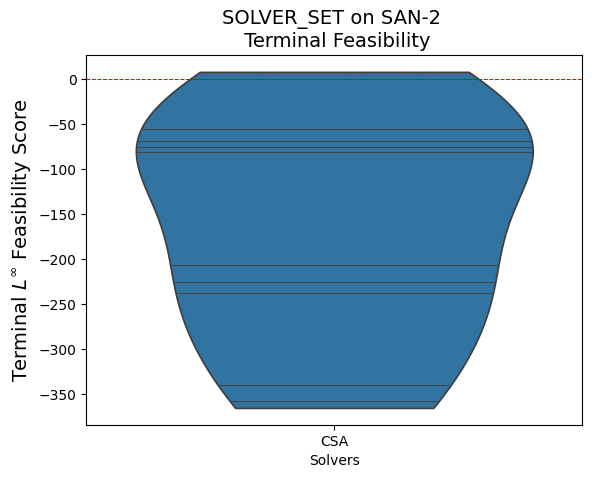

In [9]:
plot_terminal_feasibility(
    [[e1]], PlotType.FEASIBILITY_VIOLIN, all_in_one=True, two_sided=True
)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_all_prog_curves_unnorm.png')]

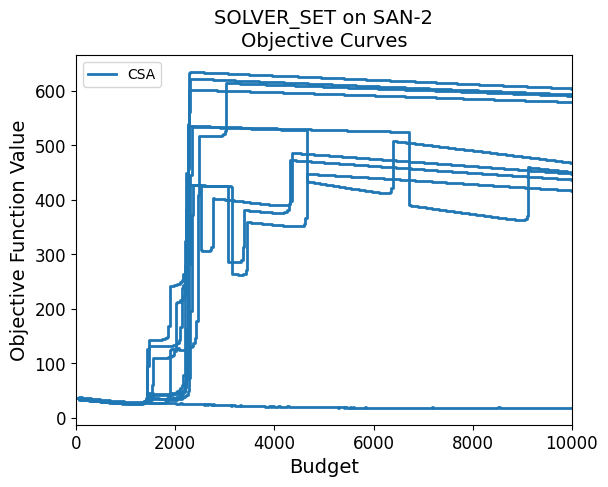

In [10]:
plot_progress_curves([e1], PlotType.ALL, normalize=False)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_all_feasibility_progress_0.5_unnorm.png')]

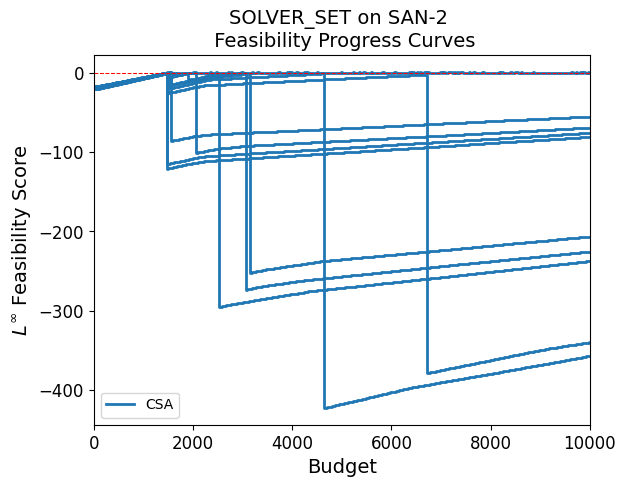

In [11]:
# plot Fig 3 a csa feasibility progress
plot_feasibility_progress([[e1]], PlotType.ALL_FEASIBILITY_PROGRESS, print_max_hw=False)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_all_prog_curves_unnorm (1).png')]

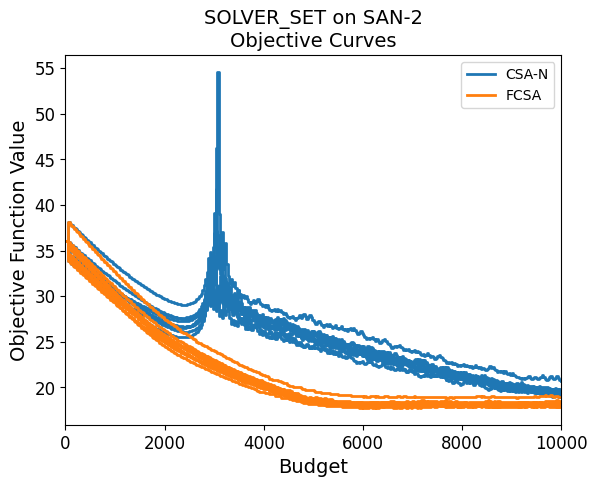

In [12]:
plot_progress_curves([e2, e3], PlotType.ALL, normalize=False)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_all_feasibility_progress_0.5_unnorm (1).png')]

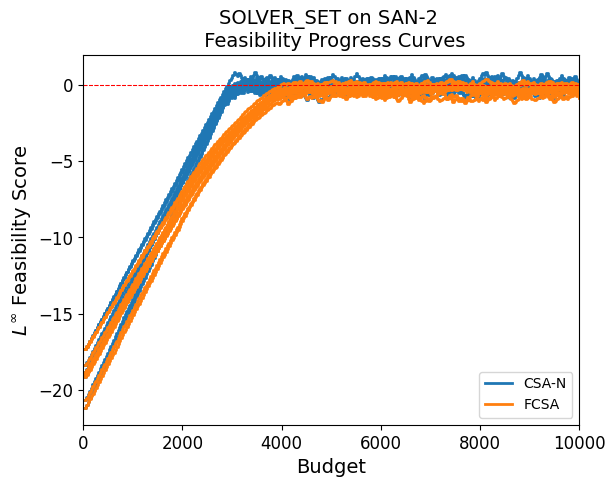

In [13]:
plot_feasibility_progress(
    [[e2], [e3]], PlotType.ALL_FEASIBILITY_PROGRESS, print_max_hw=False
)

In [14]:
# run experiments for reccomended solutions only for csa-n and fcsa
csa_n_factors = {
    "search_direction": "CSA",
    "normalize_grads": True,
    "report_all_solns": False,
    "crn_across_solns": False,
}
csa_n = FCSA(fixed_factors=csa_n_factors, name="CSA-N")
fcsa_factors = {
    "search_direction": "FCSA",
    "normalize_grads": True,
    "report_all_solns": False,
    "crn_across_solns": False,
}
fcsa = FCSA(fixed_factors=fcsa_factors, name="FCSA")
solvers = [csa_n, fcsa]

In [15]:
e2 = ProblemSolver(solver=csa_n, problem=problem)
e3 = ProblemSolver(solver=fcsa, problem=problem)

e2.run(n_macroreps=10)
e3.run(n_macroreps=10)

e2.post_replicate(n_postreps=100)
e3.post_replicate(n_postreps=100)

In [16]:
post_normalize([e2, e3], 100)

[PosixPath('/home/derekwang/data/data/Desktop/Important/Research/simopt/experiments/2025-10-21_22-52-56/plots/SOLVER_SET_SAN-2_feasibility_scatter_inf_norm_unnorm.png')]

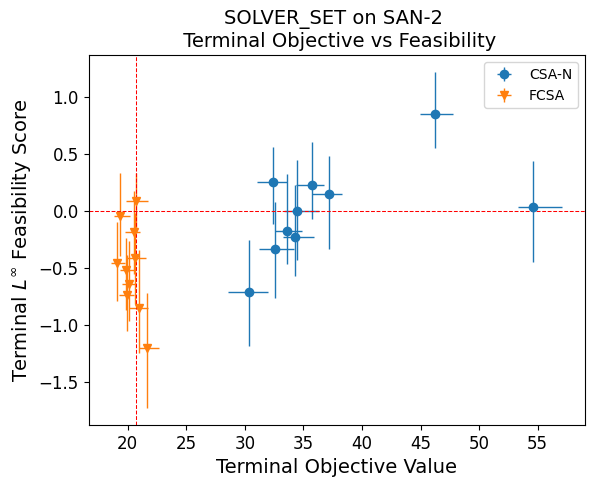

In [17]:
plot_terminal_feasibility([[e2], [e3]], PlotType.FEASIBILITY_SCATTER)